In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

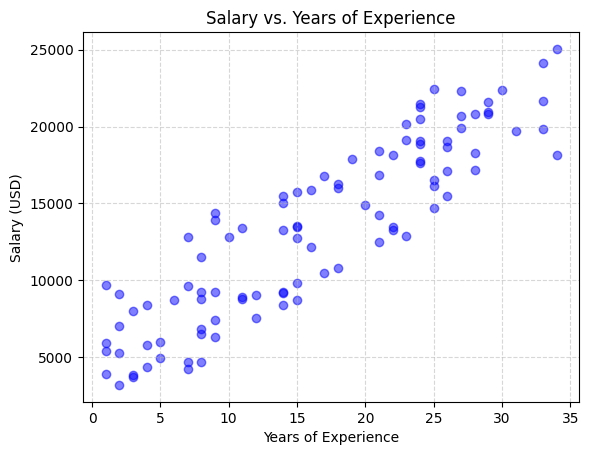

In [3]:
n = 100
max_years_of_experience = 35
min_years_of_experience = 1
max_salary_USD = 10_000
min_salary_USD = 500

np.random.seed(42)
years_of_experience = np.random.randint(min_years_of_experience, max_years_of_experience, n)
salary_USD = years_of_experience * min_salary_USD + np.random.randint(min_salary_USD, max_salary_USD, n)

X = np.array(years_of_experience).reshape(-1, 1)
y = np.array(salary_USD)

plt.scatter(X, y, alpha=0.5, color="blue", label="Data points")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (USD)")
plt.title("Salary vs. Years of Experience")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Mean squared error: 9313078.577024296
Root mean squared error: 3051.7337002144036
Mean absolute error: 2723.423047753351
R2 score: 0.7427259825998798
Intercept: 4073.322520573356
Coefficient: [564.65488931]


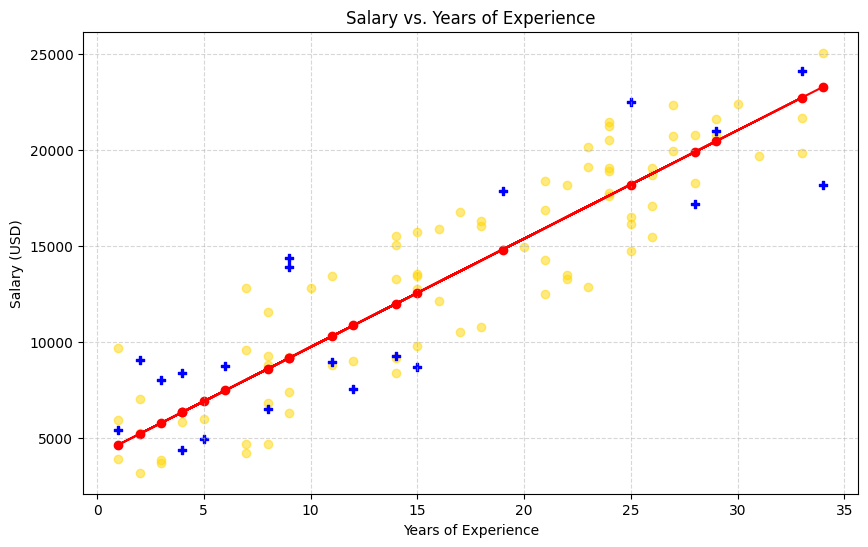

In [5]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Root mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.5, color="gold", label="Data points")
plt.plot(X_test, y_pred, color="red", label="Regression line")
plt.scatter(X_test, y_pred, color="red", label="Regression line", marker="o")
plt.scatter(X_test, y_test, color="blue", label="Test points", marker="P")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (USD)")
plt.title("Salary vs. Years of Experience")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

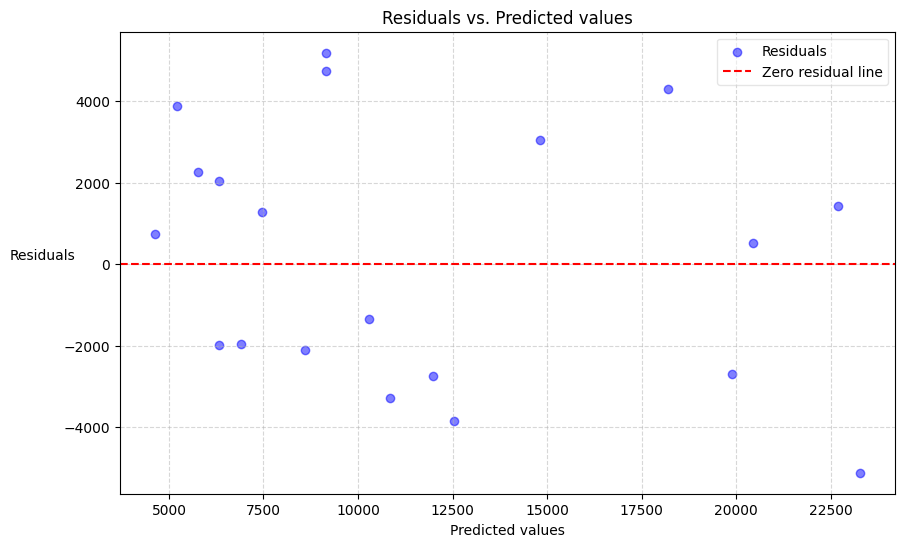

In [6]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color="blue", label="Residuals")
plt.xlabel("Predicted values")
plt.ylabel("Residuals", labelpad=15, rotation=0)
plt.title("Residuals vs. Predicted values")
plt.axhline(y=0, color="red", linestyle="--", label="Zero residual line")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="upper right", framealpha=0.5)
plt.show()

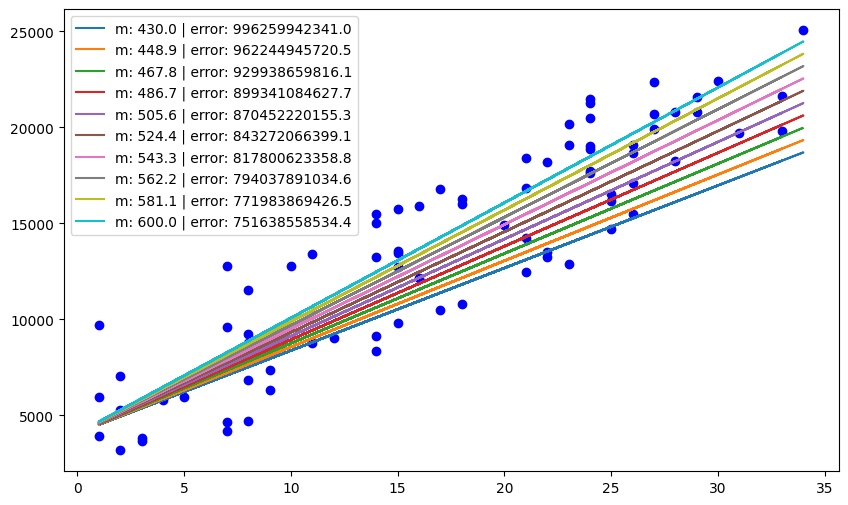

In [8]:
pendientes = np.linspace(430, 600, 10)
intercept = model.intercept_


plt.figure(figsize=(10, 6))

for pendiente in pendientes:
    error = ((y_train - X_train*pendiente + intercept) ** 2).sum()
    plt.plot(X_train, X_train*pendiente + intercept, label="m: %0.1f | error: %0.1f" % (pendiente, error))

plt.scatter(X_train, y_train, color="blue")
plt.legend()
plt.show()